### POWER PLANT

#### IMPORT LIBRARIES

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as smf

### Import dataset

In [127]:
df=pd.read_csv("power_plant.csv")
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


#### DEFINE X AND Y

In [128]:
X=df.drop(["PE"],axis=1)
X

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [129]:
Y=df[["PE"]]

In [130]:
Y

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


#### Split the dataset in training and testset

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)
X_train

,AT,V,AP,RH
6699,28.86,73.18,1012.46,68.80
8470,20.96,69.48,1011.04,82.63
8432,27.23,44.05,1005.69,58.91
2198,25.37,66.75,1017.94,79.26
2249,31.68,73.68,1014.85,64.00
...,...,...,...,...
2895,26.92,62.44,1011.09,70.80
7813,20.90,67.71,1007.16,59.02
905,18.59,39.54,1008.56,68.61
5192,22.96,45.01,1012.21,50.81


In [22]:
Y_train

,PE
6699,427.01
8470,444.31
8432,440.20
2198,434.16
2249,431.11
...,...
2895,437.99
7813,446.57
905,462.56
5192,450.37


#### Train the model on the training set

### Linear Regression - Gradient Method

In [132]:
regression_model=LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression()

#### Predict the test set results

In [143]:
Y_Predict=regression_model.predict(X_test)
x=pd.DataFrame(Y_Predict)
x

,0
0,457.242399
1,466.645195
2,440.297589
3,482.596263
4,474.907459
...,...
2866,442.243094
2867,432.219447
2868,432.279116
2869,459.461044


#### Evaluate the model

In [38]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
regression_model.score(X_test, Y_test)

0.9294885190048979

In [39]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict)

0.9294885190048979

#### Plot the results

Text(0, 0.5, 'Predicted')

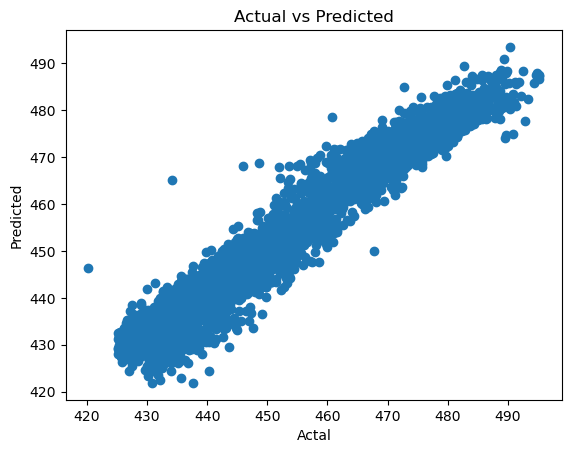

In [43]:
import matplotlib.pyplot as plt
plt.title("Actual vs Predicted")
plt.scatter(Y_test,Y_predict)
plt.xlabel("Actal")
plt.ylabel("Predicted")

#### Pair Plot

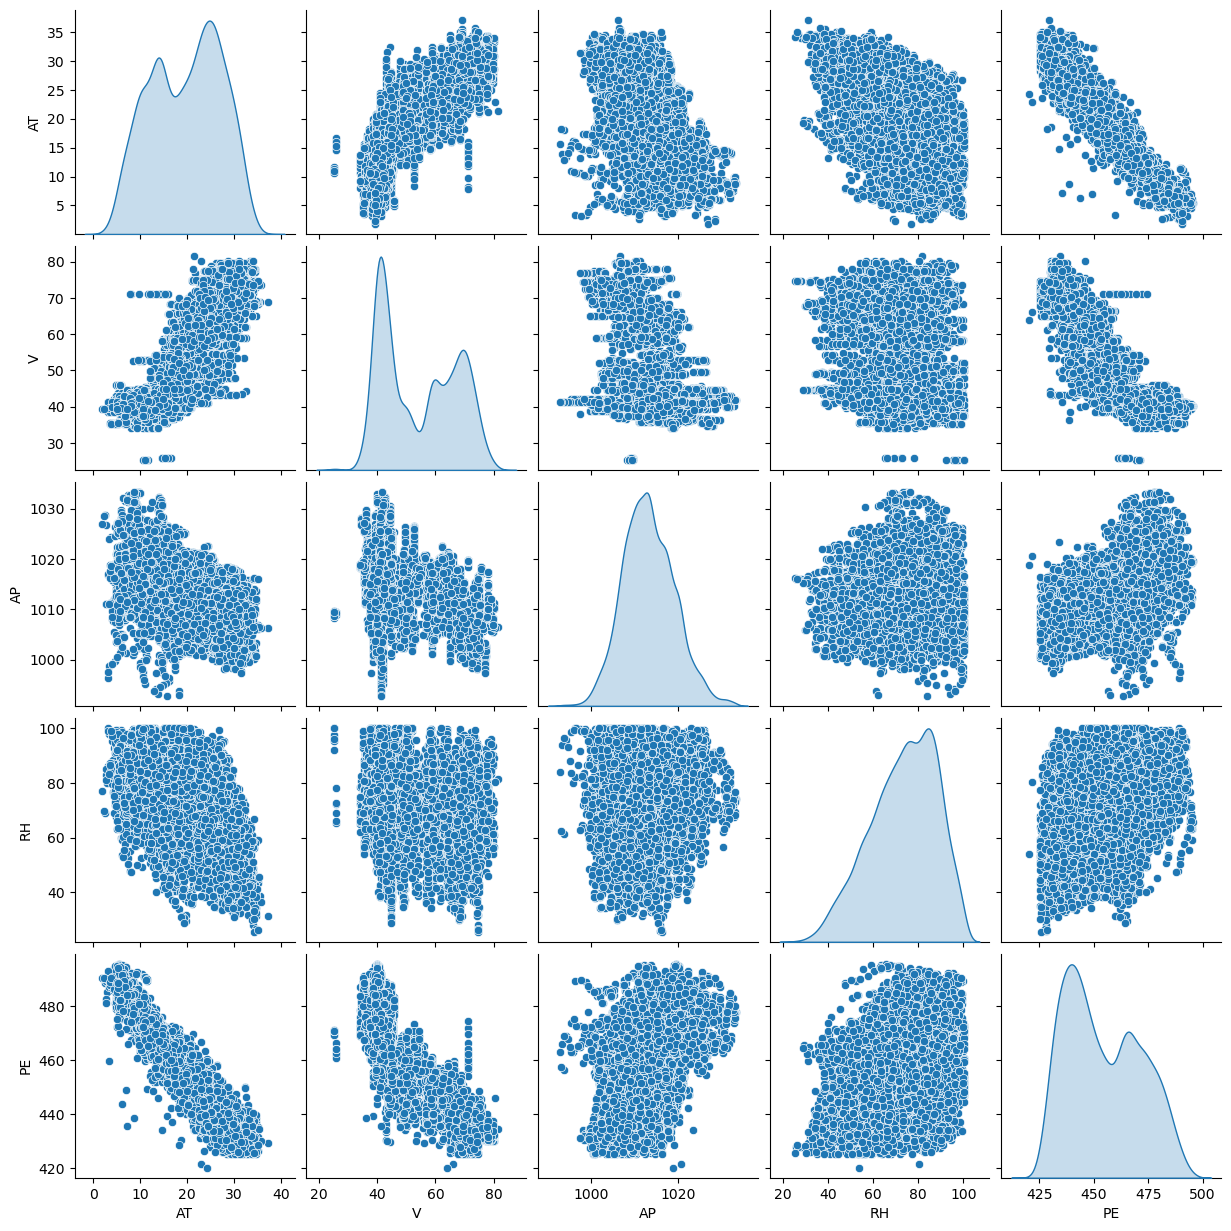

In [115]:
PP = df.iloc[:, 0:5]
sns.pairplot(PP, diag_kind='kde')  

#### Coefficient

In [108]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for AT is -1.971375934092471
The coefficient for V is -0.23772975459591314
The coefficient for AP is 0.05834485350261908
The coefficient for RH is -0.15731747773360533


#### INTERCEPT

In [109]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 458.3987750731784


### Linear Regression - OLS Method

In [159]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()

,AT,V,AP,RH,PE
6699,28.86,73.18,1012.46,68.80,427.01
8470,20.96,69.48,1011.04,82.63,444.31
8432,27.23,44.05,1005.69,58.91,440.20
2198,25.37,66.75,1017.94,79.26,434.16
2249,31.68,73.68,1014.85,64.00,431.11


In [162]:
lm1 = smf.ols(formula= 'PE ~ AT+V+AP+RH', data = data_train).fit()
print(lm1.params)

Intercept    458.398775
AT            -1.971376
V             -0.237730
AP             0.058345
RH            -0.157317
dtype: float64


In [163]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.167e+04
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:12:36   Log-Likelihood:                -19660.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    458.3988     11.562     39.649      0.0